## Emotion Detection in Tweets

# Load the dataset

In [104]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


import warnings
warnings.filterwarnings('ignore')

In [97]:
files = []
for file in glob.glob("SemEval2018-Task1-all-data/SemEval2018-Task1-all-data/English/EI-reg/training/*.txt"):
    files.append(file)
for file in glob.glob("SemEval2018-Task1-all-data/SemEval2018-Task1-all-data/English/EI-reg/development/*.txt"):
    files.append(file)

In [99]:
data1 = pd.read_csv(f"{files[0]}",sep='\t')
data2 = pd.read_csv(f"{files[1]}",sep='\t')
data3 = pd.read_csv(f"{files[2]}",sep='\t')
data4 = pd.read_csv(f"{files[3]}",sep='\t')
data5 = pd.read_csv(f"{files[4]}",sep='\t')
data6 = pd.read_csv(f"{files[5]}",sep='\t')
data7 = pd.read_csv(f"{files[6]}",sep='\t')
data8 = pd.read_csv(f"{files[7]}",sep='\t')

In [100]:
new_data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8],axis=0)

In [103]:
new_data = new_data.rename(columns={'Affect Dimension':'Emotions'})

### Let's Filter the data based on intensity score here we will take the data above 0.5 intensity.

In [ ]:
filter_data = new_data[new_data['Intensity Score'] >= 0.5]

In [ ]:
filter_data

,ID,Tweet,Emotions,Intensity Score
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,0.750
8,2017-En-11507,@MisterAK47 it's very telling that racist bigo...,anger,0.556
11,2017-En-10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
12,2017-En-10940,Lol little things like that make me so angry x,anger,0.604
...,...,...,...,...
391,2018-En-03622,Why the FUCK have i just saw a Game of Thrones...,sadness,0.550
392,2018-En-00994,@JeffBezos @amazon Who can I talk to about bei...,sadness,0.553
393,2018-En-03770,Brown envelopes can induce panic. #posttruth,sadness,0.522
395,2018-En-04002,and after i got home in such a horrible mood m...,sadness,0.727


In [ ]:
# now we will drop unnecessary fetures
filter_data.drop(['ID','Intensity Score'], axis=1, inplace=True)

In [ ]:
filter_data.head()

,Tweet,Emotions
0,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger
1,it makes me so fucking irate jesus. nobody is ...,anger
8,@MisterAK47 it's very telling that racist bigo...,anger
11,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
12,Lol little things like that make me so angry x,anger


In [3]:
df = pd.read_csv('emotion_dataset.csv')
df.head()

,Tweet,Emotions
0,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger
1,it makes me so fucking irate jesus. nobody is ...,anger
2,@MisterAK47 it's very telling that racist bigo...,anger
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
4,Lol little things like that make me so angry x,anger


In [ ]:
emotions_dataset = filter_data.append(df)
emotions_dataset = emotions_dataset.reset_index(drop=True)
emotions_dataset.head()

,Tweet,Emotions
0,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger
1,it makes me so fucking irate jesus. nobody is ...,anger
2,@MisterAK47 it's very telling that racist bigo...,anger
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
4,Lol little things like that make me so angry x,anger


In [ ]:
emotions_dataset.to_csv('emotions.csv',index=False)

In [5]:
emotions_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emotion Detection/emotions_dataset.csv')
emotions_dataset.head()

,Tweet,Emotions
0,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger
1,it makes me so fucking irate jesus. nobody is ...,anger
2,@MisterAK47 it's very telling that racist bigo...,anger
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
4,Lol little things like that make me so angry x,anger


## Exploratory data analysis

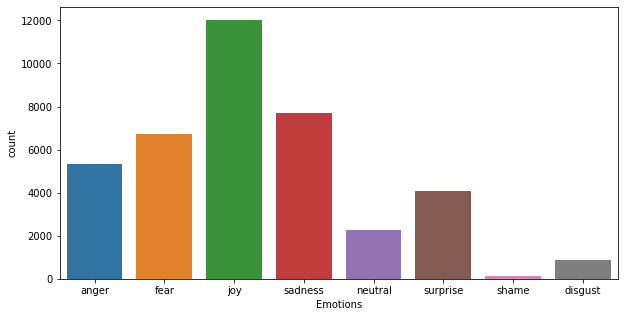

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotions', data=emotions_dataset)
plt.show()

# Data Cleaning

In [7]:
# Remove Unwanted text pattern and word from the tweets
def remove_text(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [8]:
# 1. Remove @user
emotions_dataset['clean_tweets'] = np.vectorize(remove_text)(emotions_dataset['Tweet'],"@[\w]*")

In [9]:
emotions_dataset = emotions_dataset.reset_index(drop=True)
emotions_dataset.head()

,Tweet,Emotions,clean_tweets
0,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,shut up hashtags are cool #offended
1,it makes me so fucking irate jesus. nobody is ...,anger,it makes me so fucking irate jesus. nobody is ...
2,@MisterAK47 it's very telling that racist bigo...,anger,it's very telling that racist bigots always r...
3,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,if he can't come to my Mum'a 60th after 25...
4,Lol little things like that make me so angry x,anger,Lol little things like that make me so angry x


In [10]:
# 2. Remove Punctuation, Numbers, Special Charaters
emotions_dataset['clean_tweets'] = emotions_dataset['clean_tweets'].str.replace("[^a-zA-Z#]"," ")

In [11]:
# 3. Remove Short Words like: hmm, oh etc
emotions_dataset['clean_tweets'] = emotions_dataset['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
final_df = emotions_dataset.drop(['Tweet'],axis=1)

In [13]:
final_df.head()

,Emotions,clean_tweets
0,anger,shut hashtags cool #offended
1,anger,makes fucking irate jesus nobody calling like ...
2,anger,very telling that racist bigots always resort ...
3,anger,come after tweets then should #bitter #soreloser
4,anger,little things like that make angry


In [14]:
final_df.shape

(39092, 2)

# Data Preprocessing

 #### Tokenization

In [15]:
tokenized_question1 = final_df['clean_tweets'].apply(lambda x: x.split()) #tokenizing
tokenized_question1.head()

0                    [shut, hashtags, cool, #offended]
1    [makes, fucking, irate, jesus, nobody, calling...
2    [very, telling, that, racist, bigots, always, ...
3    [come, after, tweets, then, should, #bitter, #...
4            [little, things, like, that, make, angry]
Name: clean_tweets, dtype: object

### Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmaObj = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [19]:
%%time
lemmatize_tweets = tokenized_question1.apply(lambda x: [lemmaObj.lemmatize(word) for word in x])
lemmatize_tweets.head()

CPU times: user 2.5 s, sys: 15.9 ms, total: 2.51 s
Wall time: 2.51 s


0                    [shut, hashtags, cool, #offended]
1    [make, fucking, irate, jesus, nobody, calling,...
2    [very, telling, that, racist, bigot, always, r...
3    [come, after, tweet, then, should, #bitter, #s...
4             [little, thing, like, that, make, angry]
Name: clean_tweets, dtype: object

In [20]:
final_df['lemmatize_tweets'] = lemmatize_tweets
final_df['lemmatize_tweets'] = final_df['lemmatize_tweets'].apply(lambda x: ' '.join(x))

In [21]:
final_df.head()

,Emotions,clean_tweets,lemmatize_tweets
0,anger,shut hashtags cool #offended,shut hashtags cool #offended
1,anger,makes fucking irate jesus nobody calling like ...,make fucking irate jesus nobody calling like h...
2,anger,very telling that racist bigots always resort ...,very telling that racist bigot always resort i...
3,anger,come after tweets then should #bitter #soreloser,come after tweet then should #bitter #soreloser
4,anger,little things like that make angry,little thing like that make angry


# Model Building

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

In [23]:
tf.__version__

'2.9.2'

### One Hot Representation

In [25]:
### Vocabulary size
vocab_size=5000

### onehot representation
onehot_repr=[one_hot(words,vocab_size)for words in final_df['lemmatize_tweets']] 
onehot_repr[:5]

[[4418, 3400, 2116, 2272],
 [2785, 3764, 1757, 928, 240, 4813, 1715, 3744, 4442, 4143, 2228, 430, 1717],
 [3251,
  3819,
  567,
  4542,
  1537,
  113,
  587,
  463,
  1715,
  567,
  3190,
  1190,
  2568,
  4542,
  1537],
 [1422, 1991, 2253, 1844, 2903, 355, 11],
 [1566, 3429, 1715, 567, 2785, 1870]]

In [26]:
# padding the data for equal shape
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3400 2116 2272]
 [   0    0    0 ... 2228  430 1717]
 [   0    0    0 ... 2568 4542 1537]
 ...
 [   0    0    0 ...    0  962 4760]
 [   0    0    0 ... 4867 3434  246]
 [   0    0    0 ... 2943 3693 2633]]


In [27]:
embedded_docs.shape,final_df['Emotions'].shape

((39092, 50), (39092,))

In [28]:
train = embedded_docs
target = final_df['Emotions']
train.shape, target.shape

((39092, 50), (39092,))

Convert target labels to binary labels

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
labels = final_df['Emotions'].replace({'anger':0,'fear':1,'joy':2,'sadness':3,'neutral':4,'surprise':5,'shame':6,'disgust':7})

In [31]:
binary_labels = to_categorical(labels,num_classes=8)
binary_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
binary_labels.shape

(39092, 8)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, binary_labels, test_size=0.30, random_state=0)

In [34]:
emb_dim = 2

### Bidirectional LSTM Model

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=embedded_docs.shape[1]))
model.add(Bidirectional(LSTM(128, dropout=0.3)))
model.add(Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 4)             20000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              136192    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 158,248
Trainable params: 158,248
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
428/428 [==============================] - 7s 16ms/step - loss: 1.4650 - accuracy: 0.4378 - val_loss: 1.4482 - val_accuracy: 0.4496
Epoch 2/20
428/428 [==============================] - 7s 16ms/step - loss: 1.4199 - accuracy: 0.4593 - val_loss: 1.3963 - val_accuracy: 0.4770
Epoch 3/20
428/428 [==============================] - 7s 16ms/step - loss: 1.3749 - accuracy: 0.4889 - val_loss: 1.3665 - val_accuracy: 0.4986
Epoch 4/20
428/428 [==============================] - 7s 16ms/step - loss: 1.3274 - accuracy: 0.5163 - val_loss: 1.3206 - val_accuracy: 0.5245
Epoch 5/20
428/428 [==============================] - 7s 16ms/step - loss: 1.2819 - accuracy: 0.5384 - val_loss: 1.2854 - val_accuracy: 0.5440
Epoch 6/20
428/428 [==============================] - 7s 16ms/step - loss: 1.2492 - accuracy: 0.5562 - val_loss: 1.2792 - val_accuracy: 0.5391
Epoch 7/20
428/428 [==============================] - 7s 16ms/step - loss: 1.2230 - accuracy: 0.5681 - val_loss: 1.2491 - val_accuracy: 0.5564

In [51]:
model.evaluate(X_test,y_test)

367/367 [==============================] - 2s 5ms/step - loss: 1.2125 - accuracy: 0.5753


[1.2125284671783447, 0.5752899050712585]

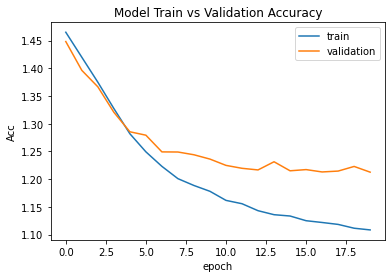

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

### Save Model

In [53]:
model.save('/content/drive/MyDrive/Colab Notebooks/Emotion Detection/model.h5')

### Model Evalution

In [56]:
y_pred = model.predict(X_test)
y_pred

367/367 [==============================] - 2s 4ms/step


array([[2.9201731e-03, 5.1853992e-03, 9.1199088e-01, ..., 2.2363251e-02,
        8.1460508e-05, 6.4604031e-04],
       [1.8683214e-02, 2.2955943e-02, 7.9441488e-01, ..., 3.9574500e-02,
        9.0127479e-04, 6.6456790e-03],
       [1.3750805e-02, 8.5718818e-03, 8.7829870e-01, ..., 2.9361445e-02,
        5.0088466e-04, 3.1351396e-03],
       ...,
       [7.7484879e-03, 1.3697232e-02, 9.2902797e-01, ..., 2.1454869e-02,
        5.0233473e-05, 1.0602260e-03],
       [1.3011841e-01, 9.7800650e-02, 2.4608514e-01, ..., 2.4483795e-01,
        1.3103562e-02, 1.3037877e-01],
       [1.7521417e-01, 4.9986225e-02, 4.4030860e-01, ..., 2.1008655e-02,
        5.7897898e-03, 2.1837698e-02]], dtype=float32)

In [60]:
y_classes = [np.argmax(y) for y in y_pred]
print(y_classes)

[2, 2, 2, 2, 1, 2, 3, 3, 7, 3, 0, 2, 5, 3, 2, 2, 5, 2, 3, 2, 0, 2, 2, 2, 3, 1, 0, 3, 2, 5, 5, 3, 2, 4, 2, 0, 3, 1, 2, 4, 2, 0, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 5, 2, 3, 0, 2, 0, 3, 2, 3, 4, 1, 0, 4, 2, 0, 2, 3, 1, 2, 0, 3, 2, 2, 1, 3, 3, 0, 2, 5, 0, 2, 1, 2, 1, 2, 1, 1, 2, 3, 0, 0, 3, 2, 1, 1, 3, 2, 2, 2, 2, 4, 2, 2, 3, 1, 3, 2, 1, 5, 3, 3, 0, 2, 2, 3, 1, 2, 3, 0, 3, 0, 2, 2, 2, 2, 0, 2, 3, 4, 2, 2, 4, 2, 1, 0, 2, 2, 5, 5, 0, 0, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2, 4, 0, 3, 4, 3, 2, 1, 5, 2, 0, 2, 4, 2, 3, 1, 3, 5, 3, 0, 0, 1, 3, 0, 3, 0, 0, 4, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 0, 2, 3, 3, 3, 1, 0, 3, 0, 1, 3, 5, 2, 2, 2, 2, 2, 1, 1, 4, 1, 2, 3, 3, 2, 1, 3, 2, 3, 0, 2, 1, 3, 3, 5, 1, 2, 2, 3, 3, 4, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 4, 2, 2, 4, 2, 1, 1, 2, 5, 5, 0, 3, 0, 0, 2, 5, 2, 5, 4, 0, 2, 2, 3, 2, 0, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 0, 3, 2, 3, 5, 0, 4, 2, 1, 3, 2, 2, 2, 0, 2, 1, 

In [62]:
y_pred = to_categorical(y_classes,num_classes=8)
y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1580
           1       0.65      0.56      0.60      2031
           2       0.58      0.73      0.65      3645
           3       0.51      0.51      0.51      2300
           4       0.77      0.66      0.71       692
           5       0.51      0.33      0.40      1214
           6       0.00      0.00      0.00        37
           7       0.10      0.01      0.02       229

   micro avg       0.58      0.58      0.58     11728
   macro avg       0.46      0.42      0.43     11728
weighted avg       0.57      0.58      0.56     11728
 samples avg       0.58      0.58      0.58     11728



### Model Testing

In [78]:
actual_lables = {'anger':0,'fear':1,'joy':2,'sadness':3,'neutral':4,'surprise':5,'shame':6,'disgust':7}
actual_lables = {v: k for k, v in actual_lables.items()}
actual_lables

{0: 'anger',
 1: 'fear',
 2: 'joy',
 3: 'sadness',
 4: 'neutral',
 5: 'surprise',
 6: 'shame',
 7: 'disgust'}

In [81]:
sent = "Today I am very happy"
onehot_repr1 = [one_hot(words,vocab_size) for words in [sent]]
onehot_repr1


[[4760, 1382, 4418, 3251, 1133]]

In [92]:
def preprocess_data(data):
  onehot_repr = [one_hot(words,vocab_size) for words in [data]]
  sent_length=50
  docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

  return docs

In [93]:
model.predict(preprocess_data(sent))

1/1 [==============================] - 0s 24ms/step


array([[0.18584318, 0.03256752, 0.60400397, 0.06645786, 0.02346527,
        0.06442963, 0.0041515 , 0.01908105]], dtype=float32)

In [94]:
prediction = np.argmax(model.predict(preprocess_data(sent)))

1/1 [==============================] - 0s 19ms/step


In [96]:
actual_lables[prediction]

'joy'